## 1 Regularization

### 1.1 Use LASSO regression to predict Salary from the other numeric predictors. Create a visualization of the coefficient trajectories. Comment on which are the final three predictors that remain in the model. Use cross-validation to find the optimal value of the regularization penality. How many predictors are left in that model?

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

In [4]:
df = pd.read_csv("Hitters.csv").dropna()
df = df.drop(['Unnamed: 0','League','Division','NewLeague'], axis = 1)
Y = df['Salary'].astype('float64')
X = df.drop('Salary', axis = 1).astype('float64')

##### Visulization

Text(0, 0.5, 'weights')

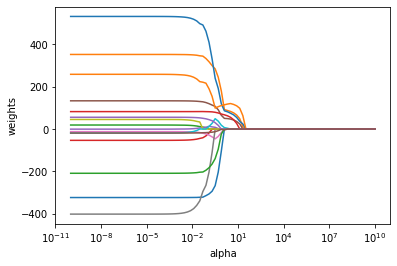

In [5]:
alphas = 10**np.linspace(10,-10,100)*0.5
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X),Y)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [6]:
# alpha = 10 is large enough to diminish the number of parameter to 3

clf = linear_model.Lasso(alpha=10, normalize = True)
lassoModel = clf.fit(X,Y)
print(pd.Series(lassoModel.coef_, index = X.columns))

AtBat      0.000000
Hits       0.329475
HmRun      0.000000
Runs       0.000000
RBI        0.000000
Walks      0.000000
Years      0.000000
CAtBat     0.000000
CHits      0.000000
CHmRun     0.000000
CRuns      0.076322
CRBI       0.204475
CWalks     0.000000
PutOuts    0.000000
Assists    0.000000
Errors     0.000000
dtype: float64


The final tree predictors that remain in the mode is : Hits, CRuns, CRBI

##### Cross-Validation Lasso

In [10]:
lassoCV = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassoCV.fit(X, Y)

lasso.set_params(alpha=lassoCV.alpha_)
lasso.fit(X,Y)

print(lassoCV.alpha_)

0.0635481759985745


In [11]:
pd.Series(lasso.coef_, index=X.columns)

AtBat     -2.082954
Hits       7.041011
HmRun      0.000000
Runs      -0.682615
RBI        0.496552
Walks      5.511781
Years     -6.107625
CAtBat    -0.087066
CHits      0.000000
CHmRun     0.156468
CRuns      1.228061
CRBI       0.583821
CWalks    -0.690601
PutOuts    0.292694
Assists    0.304372
Errors    -2.450795
dtype: float64

There are 14 parameter left: AtBat, Hits, Runs, RBI, Walks, Years, CAtBat, CHmRun, CRuns, CRBI, PutOuts, Assists, Errors

### 1.2 Repeat with Ridge Regression. Visualize coeffecient trajectories. Use crossvalidation to find the optimal vaule of the regularization penalty.

Text(0, 0.5, 'weights')

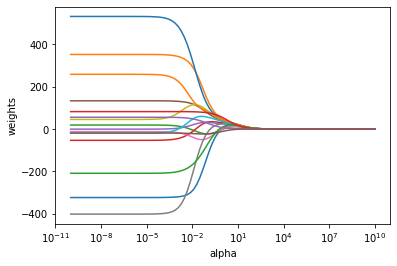

In [13]:
alphas = 10**np.linspace(10,-10,100)*0.5
ridge = Ridge(max_iter = 10000, normalize = True)
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(scale(X),Y)
    coefs.append(ridge.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')

In [14]:
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = True)
ridgecv.fit(X, Y)

ridge.set_params(alpha=ridgecv.alpha_)
ridge.fit(X, Y)

pd.Series(ridge.coef_, index=X.columns)

AtBat     -1.782104
Hits       5.774714
HmRun     -1.374004
Runs       0.140814
RBI        0.979994
Walks      5.065400
Years     -9.611559
CAtBat    -0.062104
CHits      0.177003
CHmRun     0.689584
CRuns      0.767995
CRBI       0.352217
CWalks    -0.562591
PutOuts    0.289863
Assists    0.301571
Errors    -3.403328
dtype: float64

## 2

### Explain in your own words the bias-variance tradeoff. What role does regularization play in this tradeoff? Make reference to your findings in number (1) to describe models of high/low bias and variance.

Model with high bias pay very little attention to the training data and oversimplifies the model. However, Model with high variance pays a lot of attention to training data and does not generalize on the data which it hasn't seen before. Variance and bias compensate each other sometime. Regularization can reduce the number of predictors and increase bias and lower the variance. If without regularization, our model would have very low bias and high variance. However, applying lasso or ridge, the number of predictors decrease and bias higher while variance lower.